Import libraries and data management plan dataset
Change paths to your own path
COT was a problem, I replaced 'COT' by cot in the keywords dataframe, but maybe you want to do this in the original excel file

In [2]:
import os
import pandas as pd
import csv

# The directory path containing the text files (all MPA management files that already converted into txt files)
directory_path = 'YourDirectoryPath/MP_Full'  # 78 MMAF MPAs


# Specify the file path of the CSV file containing keywords
keyword_file_path = 'YourDirectoryPath/keywords_python.csv'

# Specify the directory path for results
directory_result = 'YourDirectoryPath/Results/Data'

# Ensure that the directories exist
os.makedirs(directory_result, exist_ok=True)

# Load keywords from CSV file into pandas dataframe
keywords_df = pd.read_csv(keyword_file_path, delimiter=';')
keywords_df['keywords'] = keywords_df['keywords'].str.replace('COT','cot')
#display(keywords_df)

# Extract list of keywords
keywords = keywords_df.keywords.to_list()
print(keywords, '\n')

# Create a list with all texts and a list with the accompanying filenames 
text_data = []
filenames = []
for filename in os.listdir(directory_path):
    file_name = filename.replace(".txt", "")
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        filenames.append(file_name)
        # Read the content of each text file
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            text_data.append(text)
print(filenames)

# Dictionary with bahasa words belonging to english stressor terms
column_mapping = {
    'abrasi': 'abrasion',
    'alat tangkap yang merusak':'destructive fishing',
    'alih fungsi lahan': 'habitat loss',    
    'aliran permukaan': 'runoff',
    'badai': 'storms',    
    'bahan bangunan': 'coral mining',    
    'bahan peledak': 'bombing',       
    'bius': 'cyanide',
    'bleaching': 'bleaching',
    'bom':'bombing',    
    
    'bukaan lahan':'habitat loss',  
    'bycatch': 'bycatch',
    'by-catch': 'bycatch',    
    'climate change': 'climate change',
    'cot': 'crown of thorn',
    'crown of thorn': 'crown of thorn',
    'cuaca ekstrim': 'extreme weather',
    'cyanida': 'cyanide',    
    'deforestasi': 'deforestation',
    
    'destructive fishing': 'destructive fishing',
    'eksploitasi berlebih': 'overfishing',
    'erosi': 'erosion', 
    'eutrofikasi': 'eutrophication', 
    'eutrophication': 'eutrophication',
    'gelombang panas': 'heatwave',
    'global warming': 'global warming',
     
    'illegal fishing': 'illegal fishing',
    'jangkar': 'anchoring',
    'jaring hela': 'purse seine',
    'kenaikan suhu air laut': 'increasing SST',
    'kompresor': 'hookah compressor',
    'letusan gunung berapi': 'volcano eruptions',
    
    'limbah cair': 'sewage discharge',
    'limbah rumah tangga': 'sewage discharge',
    'mariculture': 'mariculture',
    'minyak dan gas': 'mining (oil and gas)',
    'muroami': 'muroami',
    'overfishing': 'overfishing',
    'pemanasan global ': 'global warming',

    'pembangunan pemukiman': 'coastal development',
    'pembiusan': 'cyanide',
    'pembuangan air balast': 'ballast water',
    'pembuangan air limbah': 'sewage discharge',
    'pemutihan': 'bleaching', 
    'penambangan': 'sand mining',
    'penangkapan berlebih': 'overfishing',
    'penangkapan ikan yang berlebih': 'overfishing',
    'penangkapan ikan yang merusak': 'destructive fishing',
    'penangkapan illegal': 'illegal fishing', 
    'penangkapan merusak': 'destructive fishing',
    
    'pencurian ikan': 'illegal fishing', 
    'penebangan': 'deforestation',
    'pengambilan batu karang': 'coral mining',
    'pengambilan karang': 'coral mining',
    'pengambilan pasir': 'sand mining',
    'pengembangan pantai': 'coastal development',
    'pengembangan pesisir':  'coastal development',
    'pengikisan pantai':'abrasion',
    
    'peningkatan suhu air laut': 'increasing SST',
    'penyakit': 'disease',
    'pertambangan': 'mineral mining',
    'perubahan habitat':'habitat loss',
    'perubahan iklim': 'climate change',    
    'pestisida': 'pesticide - fertilizer',
    'planci': 'crown of thorn',
    'plastik': 'plastic',
    'potasium': 'cyanide',
    'pukat': 'purse seine',
    'pupuk': 'pesticide - fertilizer',
    'racun':'cyanide',
    
    'reklamasi': 'reclamation',
    'runoff': 'runoff',
    'run-off': 'runoff',
    'sanitasi': 'sewage discharge',
    'sedimentasi': 'sedimentation', 
    'sianida': 'cyanide',
    'tambak': 'aquaculture pond',
    'tangkap lebih': 'overfishing',
    'tangkapan sampingan': 'bycatch',
    'trawl': 'trawl',
}


['abrasi', 'alat tangkap yang merusak', 'alih fungsi lahan', 'aliran permukaan', 'badai', 'bahan bangunan', 'bahan peledak', 'bius', 'bleaching', 'bom', 'bukaan lahan', 'bycatch', 'by-catch', 'climate change', 'cot', 'crown of thorn', 'cuaca ekstrim', 'cyanida', 'deforestasi', 'destructive fishing', 'eksploitasi berlebih', 'erosi', 'eutrofikasi', 'eutrophication', 'gelombang panas', 'global warming', 'illegal fishing', 'jangkar', 'jaring hela', 'kenaikan suhu air laut', 'kompresor', 'letusan gunung berapi', 'limbah cair', 'limbah rumah tangga', 'mariculture', 'minyak dan gas', 'muroami', 'overfishing', 'pemanasan global ', 'pembangunan pemukiman', 'pembiusan', 'pembuangan air balast', 'pembuangan air limbah', 'pemutihan', 'penambangan', 'penangkapan berlebih', 'penangkapan ikan yang berlebih', 'penangkapan ikan yang merusak', 'penangkapan illegal', 'penangkapan merusak', 'pencurian ikan', 'penebangan', 'pengambilan batu karang', 'pengambilan karang', 'pengambilan pasir', 'pengembangan 

In [3]:
#Total number of words per document
wordcount = []
for text in text_data:
    num_words = float(len(text.split()))
    wordcount.append(num_words)
wordcount_df = pd.DataFrame({'wordcount' : wordcount}, index = filenames)
display(wordcount_df)

,wordcount
National_Anambas_Riau Islands_2014,33174.0
National_Aru Tenggara_Maluku_2014,23052.0
National_Banda_Maluku_2014,15847.0
National_Gili Matra_West Nusa Tenggara_2014,36767.0
National_Kapoposang_South Sulawesi_2014,38682.0
...,...
Provincial_Tatoareng_North Sulawesi_2019,37369.0
Provincial_Teluk Cempi_West Nusa Tenggara_2018,20313.0
Provincial_Ujung Negoro Roban_Central Java_2012,26107.0
Provincial_Weh_Aceh_2010,15750.0


In [4]:
#Counts (TF) keywords in Bahasa
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(vocabulary=keywords, lowercase=True, ngram_range=(1, 4))
count_matrix = count_vectorizer.fit_transform(text_data)
count_df= pd.DataFrame.sparse.from_spmatrix(count_matrix, index = filenames, columns = keywords)
display(count_df)

,abrasi,alat tangkap yang merusak,alih fungsi lahan,aliran permukaan,badai,bahan bangunan,bahan peledak,bius,bleaching,bom,...,reklamasi,runoff,run-off,sanitasi,sedimentasi,sianida,tambak,tangkap lebih,tangkapan sampingan,trawl
National_Anambas_Riau Islands_2014,0,1,0,0,0,1,0,0,0,9,...,0,0,0,0,0,3,0,3,0,3
National_Aru Tenggara_Maluku_2014,1,0,0,0,0,1,1,0,0,2,...,0,0,0,0,2,1,0,0,0,1
National_Banda_Maluku_2014,1,0,0,0,0,1,0,0,2,5,...,0,0,0,0,2,0,1,0,1,2
National_Gili Matra_West Nusa Tenggara_2014,2,1,0,0,1,0,8,0,1,11,...,0,0,0,0,0,11,2,0,0,8
National_Kapoposang_South Sulawesi_2014,14,0,0,0,0,2,8,7,0,11,...,0,0,0,3,1,8,4,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Provincial_Tatoareng_North Sulawesi_2019,3,0,0,0,0,0,0,2,0,2,...,0,0,0,0,1,0,1,2,0,0
Provincial_Teluk Cempi_West Nusa Tenggara_2018,0,0,1,0,0,0,0,0,0,7,...,0,0,0,0,0,0,9,0,0,0
Provincial_Ujung Negoro Roban_Central Java_2012,30,0,0,0,0,0,0,0,2,0,...,0,0,0,0,29,0,3,0,0,0
Provincial_Weh_Aceh_2010,7,1,0,0,0,1,0,1,5,3,...,0,0,0,0,1,2,0,0,0,0


In [5]:
#Counts (TF) keywords in English
# Rename the columns as per column_mapping
count_eng_df = count_df.rename(columns=column_mapping)
# Sum columns with the same name
count_eng_df = count_eng_df.T.groupby(count_eng_df.columns).sum().T
keywords_eng = count_eng_df.columns.to_list()
print(keywords_eng)
display(count_eng_df)

['abrasion', 'anchoring', 'aquaculture pond', 'ballast water', 'bleaching', 'bombing', 'bycatch', 'climate change', 'coastal development', 'coral mining', 'crown of thorn', 'cyanide', 'deforestation', 'destructive fishing', 'disease', 'erosion', 'eutrophication', 'extreme weather', 'global warming', 'habitat loss', 'heatwave', 'hookah compressor', 'illegal fishing', 'increasing SST', 'mariculture', 'mineral mining', 'mining (oil and gas)', 'muroami', 'overfishing', 'pesticide - fertilizer', 'plastic', 'purse seine', 'reclamation', 'runoff', 'sand mining', 'sedimentation', 'sewage discharge', 'storms', 'trawl', 'volcano eruptions']


,abrasion,anchoring,aquaculture pond,ballast water,bleaching,bombing,bycatch,climate change,coastal development,coral mining,...,plastic,purse seine,reclamation,runoff,sand mining,sedimentation,sewage discharge,storms,trawl,volcano eruptions
National_Anambas_Riau Islands_2014,0,5,0,0,0,9,0,0,0,2,...,0,7,0,0,1,0,0,0,3,0
National_Aru Tenggara_Maluku_2014,1,3,0,0,0,3,0,0,0,4,...,1,0,0,0,1,2,0,0,1,0
National_Banda_Maluku_2014,1,2,1,0,2,5,1,2,0,8,...,2,5,0,0,5,2,0,0,2,2
National_Gili Matra_West Nusa Tenggara_2014,2,16,2,0,3,19,0,42,0,7,...,1,0,0,0,1,0,0,1,8,0
National_Kapoposang_South Sulawesi_2014,14,4,4,0,0,19,0,0,0,2,...,1,3,0,0,2,1,4,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Provincial_Tatoareng_North Sulawesi_2019,3,2,1,0,0,2,1,2,0,1,...,0,1,0,0,0,1,0,0,0,0
Provincial_Teluk Cempi_West Nusa Tenggara_2018,0,0,9,0,0,7,0,0,0,4,...,0,2,0,0,12,0,4,0,0,0
Provincial_Ujung Negoro Roban_Central Java_2012,30,0,3,0,4,0,0,2,0,0,...,0,0,0,0,0,29,1,0,0,0
Provincial_Weh_Aceh_2010,7,4,0,0,11,3,0,0,0,1,...,0,7,0,0,2,1,0,0,0,0


In [6]:
len(keywords_eng)

40

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re  # Import the re module for regular expressions

# Extracting the year from filenames
years = []
for filename in filenames:
    year_match = re.search(r'_(\d{4})$', filename)  # Look for a 4-digit year preceded by an underscore at the end
    if year_match:
        year = year_match.group(1)
    else:
        year = 'Unknown'
    years.append(year)

# Create a DataFrame for the extracted years
years_df = pd.DataFrame({'Year': years}, index=filenames)

# Combine the DataFrames
combined_df = pd.concat([wordcount_df, years_df, count_eng_df], axis=1)

# Create a new 'File Name' column with the filenames
combined_df.insert(0, 'File Name', combined_df.index)

# Reset the index to avoid confusion
combined_df.reset_index(drop=True, inplace=True)

# Specify your desired file path and name for the Excel file
excel_file_path = 'YourDirectoryPath/Absolute_keyword_count_Full.xlsx'  
combined_df.to_excel(excel_file_path, engine='openpyxl', index=False)  

print("DataFrame saved to Excel successfully!")

DataFrame saved to Excel successfully!


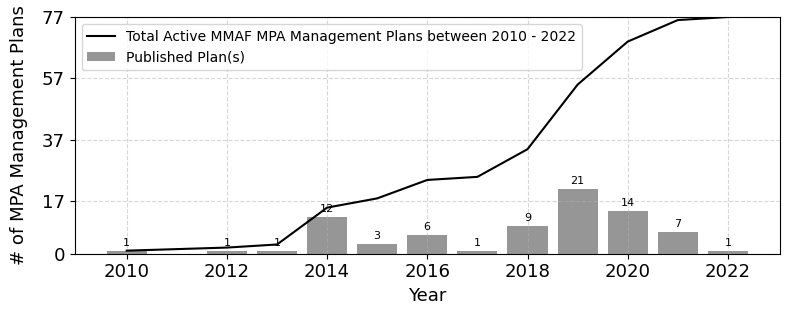

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

# Read the CSV file into a DataFrame
df = pd.read_excel('YourDirectoryPath/Absolute_keyword_count_Full.xlsx')

# Assuming 'Year' is a column in your DataFrame
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group by year and count the unique file names to get the total plans published per year
total_plans_per_year = df.groupby(df['Year'].dt.year)['File Name'].nunique()

# Create a bar graph for the total plans published per year
plt.figure(figsize=(8, 3.25))

# Plot the bar graph
bars = plt.bar(total_plans_per_year.index, total_plans_per_year, color='#969696', label='Published Plan(s)')

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=8)

# Add a line plot (for example, cumulative plans)
cumulative_plans = total_plans_per_year.cumsum()
plt.plot(cumulative_plans.index, cumulative_plans, color='black', label='Total Active MMAF MPA Management Plans between 2010 - 2022', marker='', linestyle='-')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('# of MPA Management Plans', fontsize=13, labelpad=10)
plt.ylim(0, 77)

# Set custom y-axis tick labels
plt.yticks([0, 17, 37, 57, 77], fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.xticks(range(2010, 2024, 2), rotation=0, fontsize=13)

# Add legend
plt.legend()
# Add gridlines in the background
plt.grid(True, linestyle='--', alpha=0.5)

# Define the output directory and filename
output_directory = 'YourDirectoryPath/Results/Figure'  # Change this to your desired directory
output_filename = 'mpa_management_plans.jpg'  # Change this to your desired filename
output_path = os.path.join(output_directory, output_filename)

# Save the plot to the specified directory
plt.tight_layout()

plt.savefig(output_path, dpi=1500, bbox_inches='tight')

# Show the plot
plt.show()


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Read the Excel file into a DataFrame
df = pd.read_excel('YourDirectoryPath/Absolute_keyword_count_Full.xlsx')

# Fill NaN values with 0 in all numeric columns
df.fillna(0, inplace=True)

# Manually specify subcategories
categories = {
    'Other': ['coral mining', 'mining (oil and gas)', 'disease',
              'crown of thorn', 'volcano eruptions', 'mariculture',
              'ballast water'],
    'Climate Change': ['climate change', 'bleaching', 'storms', 'global warming', 'increasing SST',
                       'extreme weather', 'heatwave'],
    'Land-based': ['sedimentation', 'abrasion', 'deforestation', 'aquaculture pond',
                   'erosion', 'sewage discharge', 'habitat loss', 'pesticide - fertilizer', 
                   'reclamation', 'eutrophication', 'coastal development', 
                   'runoff', 'plastic', 'mineral mining', 'sand mining'],
    'Fishing Activities': ['bombing', 'cyanide', 'anchoring', 'destructive fishing', 'purse seine',
                          'hookah compressor', 'trawl', 'overfishing', 'illegal fishing', 
                          'bycatch', 'muroami'],
}

# Calculate document count per column (non-zero entries)
document_count_per_column = df.astype(bool).sum()

# Exclude columns that are not stressors (e.g., 'File Name', 'Year', 'wordcount')
exclude_columns = ['File Name', 'Year', 'wordcount']
document_count_per_column = document_count_per_column.drop(exclude_columns, errors='ignore')

# Convert counts to a dictionary for easier access
document_count_dict = document_count_per_column.to_dict()

# Print document counts per subcategory
for category, subcategories in categories.items():
    print(f"{category}:")
    for subcategory in subcategories:
        count = document_count_dict.get(subcategory, 0)
        print(f"  {subcategory}: {count}")


Other:
  coral mining: 49
  mining (oil and gas): 29
  disease: 35
  crown of thorn: 11
  volcano eruptions: 3
  mariculture: 7
  ballast water: 1
Climate Change:
  climate change: 40
  bleaching: 34
  storms: 22
  global warming: 1
  increasing SST: 5
  extreme weather: 2
  heatwave: 0
Land-based:
  sedimentation: 43
  abrasion: 44
  deforestation: 46
  aquaculture pond: 41
  erosion: 25
  sewage discharge: 29
  habitat loss: 15
  pesticide - fertilizer: 10
  reclamation: 7
  eutrophication: 8
  coastal development: 7
  runoff: 3
  plastic: 15
  mineral mining: 31
  sand mining: 54
Fishing Activities:
  bombing: 67
  cyanide: 62
  anchoring: 49
  destructive fishing: 51
  purse seine: 48
  hookah compressor: 49
  trawl: 42
  overfishing: 40
  illegal fishing: 21
  bycatch: 19
  muroami: 15


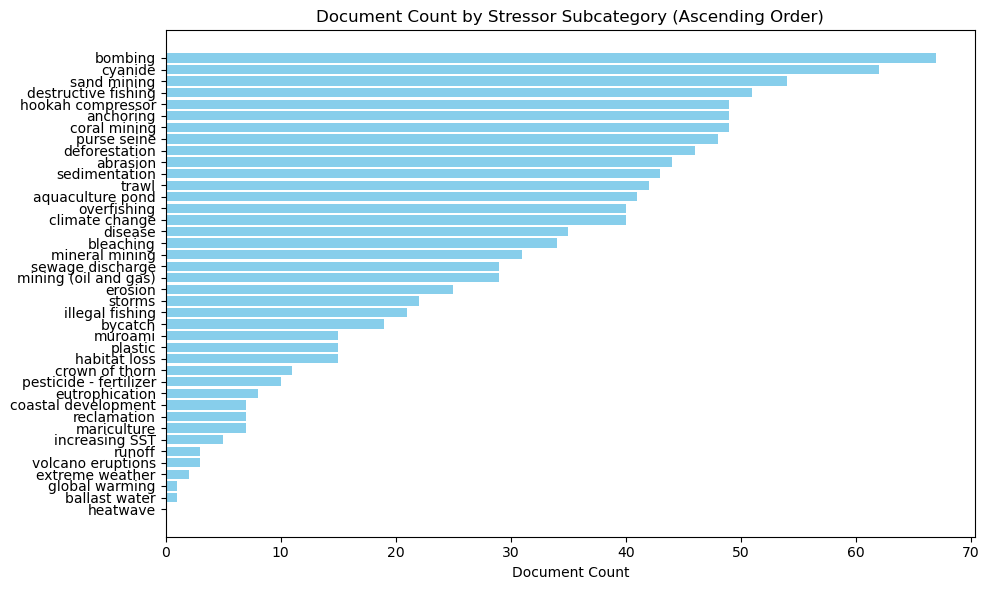

In [10]:
import matplotlib.pyplot as plt

# Collect all subcategories and their document counts in a list
all_subcategories = []
all_counts = []

# Populate subcategories and counts from the dictionary
for category, subcategories in categories.items():
    for subcategory in subcategories:
        count = document_count_dict.get(subcategory, 0)
        all_subcategories.append(subcategory)
        all_counts.append(count)

# Sort the subcategories by their counts in ascending order
sorted_subcategories, sorted_counts = zip(*sorted(zip(all_subcategories, all_counts), key=lambda x: x[1]))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(sorted_subcategories, sorted_counts, color='skyblue')

# Add labels and title
ax.set_xlabel('Document Count')
ax.set_title('Document Count by Stressor Subcategory (Ascending Order)')
plt.tight_layout()

# Show the plot
plt.show()


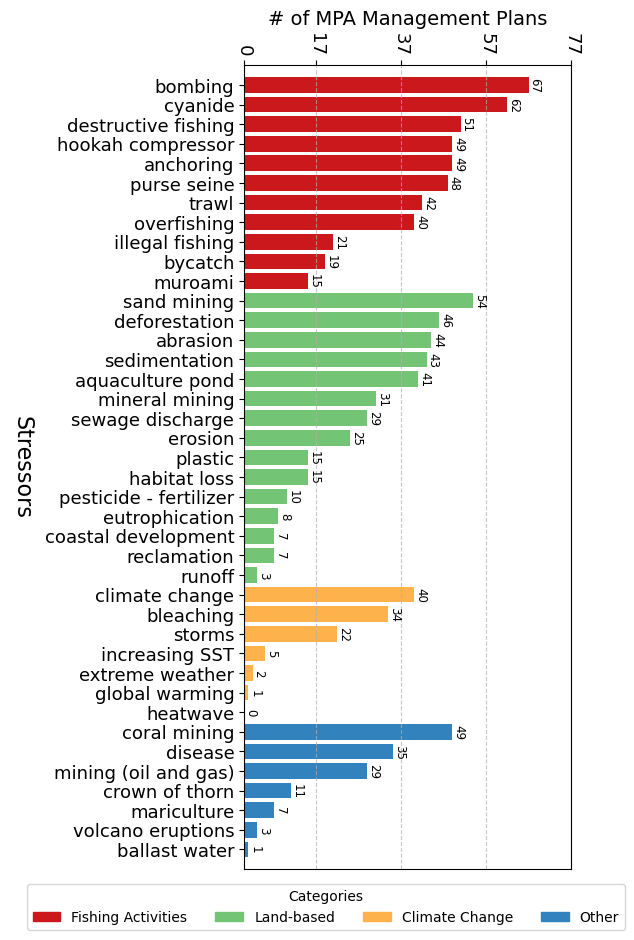

In [11]:
# Sort subcategories
sorted_categories = {}
for category, subcategories in categories.items():
    sorted_subcategories = sorted(subcategories, key=lambda subcat: document_count_dict.get(subcat, 0), reverse=False)
    sorted_categories[category] = sorted_subcategories

# Set colors for each category
colors = ['#3182bd', '#feb24c', '#74c476', '#cb181d']

# Create bar plot
fig, ax = plt.subplots(figsize=(6, 9.5))

subcategory_colors = []
subcategory_labels = []
bar_positions = []

for category, subcategories in sorted_categories.items():
    for subcategory in subcategories:
        subcategory_colors.append(colors[list(categories.keys()).index(category)])
        subcategory_labels.append(subcategory)
        bar_positions.append(document_count_dict.get(subcategory, 0))

bar_plot = ax.barh(subcategory_labels, bar_positions, color=subcategory_colors)

# Legend
legend_order = ['Fishing Activities', 'Land-based', 'Climate Change', 'Other']
legend_colors = [colors[list(categories.keys()).index(cat)] for cat in legend_order]
legend_patches = [Patch(color=legend_colors[i], label=legend_order[i]) for i in range(len(legend_order))]

# Create legend
ax.legend(handles=legend_patches, title='Categories', bbox_to_anchor=(0.25, -0.01), loc='upper center', fontsize=10, ncol=len(legend_order) )

# Set labels and title
ax.set_title('# of MPA Management Plans', fontsize=14)
ax.set_ylabel('Stressors', fontsize=16, rotation=270, labelpad=25)
ax.tick_params(axis='y', which='major', labelsize=13)

# Set x-axis ticks and labels
ax.set_xticks([0, 17, 37, 57, 77])
ax.set_xticklabels([0, 17, 37, 57, 77], rotation=270, fontsize=13)
ax.xaxis.tick_top()

# Padding
ax.set_ylim(-1, len(subcategory_labels))

# Add labels at the end of each bar
for label, x, y in zip(subcategory_labels, bar_positions, range(len(bar_positions))):
    ax.text(x, y, f'{x:.0f}', ha='left', va='center', fontsize=8.5, color='black', rotation=270)

# Add gridlines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Display plot
plt.tight_layout()

# Save plot
output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/'  # Change this to your desired directory
output_file_path = output_directory + 'MP_Count1.pdf'
plt.savefig(output_file_path, dpi=600, bbox_inches='tight')  # Adjust DPI if needed

plt.show()

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Read the Excel file into a DataFrame
df = pd.read_excel('YourDirectoryPath/Absolute_keyword_count_Full.xlsx')

# Fill NaN values with 0 in all numeric columns
df.fillna(0, inplace=True)

# Manually specify subcategories
categories = {
    'Other': ['coral mining',
              #'mining (oil and gas)', 'disease',
              #'crown of thorn', 'volcano eruptions', 'mariculture',
              'ballast water'],
   # 'Climate Change': ['climate change', 'bleaching', 'storms', 'global warming', 'increasing SST',
    #                   'extreme weather', 'heatwave'],
    #'Land-based': ['sedimentation', 'abrasion', 'deforestation', 'aquaculture pond',
     #              'erosion', 'sewage discharge', 'habitat loss', 'pesticide - fertilizer', 
      #             'reclamation', 'eutrophication', 'coastal development', 
       #            'runoff', 'plastic', 'mineral mining', 'sand mining'],
    #'Fishing Activities': ['bombing', 'cyanide', 'anchoring', 'destructive fishing', 'purse seine',
       #                   'hookah compressor', 'trawl', 'overfishing', 'illegal fishing', 
      #                    'bycatch', 'muroami'],
}

# Create a dictionary to store documents for each stressor
documents_per_stressor = {}

# Iterate through each subcategory to find documents
for category, subcategories in categories.items():
    for subcategory in subcategories:
        # Find documents that mention the stressor
        documents = df[df[subcategory] > 0]['File Name'].tolist()  # Assuming 'File Name' column contains document names
        documents_per_stressor[subcategory] = documents

# Print out the documents mentioning each stressor
for subcategory, documents in documents_per_stressor.items():
    print(f"{subcategory}: {documents}")


coral mining: ['National_Anambas_Riau Islands_2014', 'National_Aru Tenggara_Maluku_2014', 'National_Banda_Maluku_2014', 'National_Gili Matra_West Nusa Tenggara_2014', 'National_Kapoposang_South Sulawesi_2014', 'National_Padaido_Papua_2014', 'National_Raja Ampat_West Papua_2014', 'National_Sawu_East Nusa Tenggara_2014', 'National_Waigeo Sebelah Barat_West Papua_2014', 'Provincial_Aceh Besar_Aceh_2019', 'Provincial_Angsana_South Kalimantan_2019', 'Provincial_Ay Rhun_Maluku_2020', 'Provincial_Binusan Sinelak_North Kalimantan_2020', 'Provincial_Bontang_East Kalimantan_2019', 'Provincial_Buano_Maluku_2020', 'Provincial_Derawan_East Kalimantan_2019', 'Provincial_Flores Timur_East Nusa Tenggara_2018', 'Provincial_Gili Banta_West Nusa Tenggara_2018', 'Provincial_Gili Sulat Lawang_West Nusa Tenggara_2016', 'Provincial_Gili Tangkong Nanggu Sudak_West Nusa Tenggara_2016', 'Provincial_Guraici_North Maluku_2020', 'Provincial_HMAS Perth_Banten_2018', 'Provincial_Kaimana_West Papua_2018', 'Provincial